# Example - Logistic Regression
---

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

+ load_iris : iris데이터 로드 모듈
+ train_test_split : 배열을 받아 훈련,테스트 셋으로 분리해주는 모듈
+ StandardScaler : 평균이 0과 표춘편차가 1이 되도록 변환(스케일링) 모듈
+ accuracy_score : 분류의 결과 정확도 평가 모듈

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import style

+ ListedColormap : list, array를 받아 컬러맵을 생성하는 모듈
+ style : 그래프, 표 등 표시 스타일 설정관리 모듈

In [3]:
from sklearn.linear_model import Perceptron #퍼셉트론 인공신경망
from sklearn.linear_model import LogisticRegression #로지스틱회귀

In [4]:
#폰트 설정
krfont = {'family':'NanumGothic', 'weight':'bold', 'size':11}
mpl.rc('font', **krfont)

#한글 폰트 깨지는 문제 해결
mpl.rcParams['axes.unicode_minus'] = False 

#cmap을 배열로 작성하지 않았을 때 생기는 warning을 무시
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [5]:
iris = load_iris()

In [6]:
X = iris.data[:, [2, 3]] #iris 데이터 0차원의 모든요소,1차원의 2,3요소 분리
y = iris.target #iris의 정답지인 target을 분리

iris.data[:10,[2,3]]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

In [7]:
#분리된 데이터 집합 X, y를 test용 데이터와 train용 데이터로 선별. test 데이터의 비중은 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#데이터를 표준화 시킬 standardScaler
sc = StandardScaler() 
#표준화(스케일링) 하기 전에 표준화에 필요한 평균과 표준편차를 X_train데이터를 바탕으로 계산한다.
sc.fit(X_train)
#X_train데이터를 표준화하여 X_train_std에 넣는다
X_train_std = sc.transform(X_train)
#X_test데이터도 마찬가지로 표준화하여 X_test_std에 넣는다.
X_test_std = sc.transform(X_test)

#out을 보면 표준화된 X_train_std를 확인가능. 평균에서 얼마나 떨어져있는지 알 수 있다
X_train_std[:10,:]

array([[-0.18295039, -0.29318114],
       [ 0.93066067,  0.7372463 ],
       [ 1.04202177,  1.63887031],
       [ 0.6522579 ,  0.35083601],
       [ 1.09770233,  0.7372463 ],
       [ 0.03977182, -0.16437771],
       [ 1.26474398,  1.38126345],
       [ 0.48521625,  0.47963944],
       [-0.01590873, -0.16437771],
       [ 0.59657735,  0.7372463 ]])

In [8]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [28]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.01, title=''):
    markers = ('s', '^', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))]) 
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx.ravel(), yy.ravel()]).T) 
    Z=Z.reshape(xx.shape) 
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], c=cmap(idx), marker=markers[idx], label=cl)

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='yellow', linewidth=1, marker='x', s=80, label='테스트셋')

    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    plt.show()
    print(Z)

## plot_decision_resions(...)
---

> ### Parameter
>- X : 데이터 세트 X (표준화된 학습,테스트가 합쳐진 전체)
>- y : 데이터에 대한 타겟 데이터 y (학습, 테스트 전체에 대한 타겟)
>- classifier : 학습 시킨 분류기
>- test_idx : 전체 데이터 세트에서 테스트 데이터의 인덱스
>- title : 그릴 그래프의 전체 제목
---
> ### Implement code
>- markers : 데이터가 그래프에 찍히는 모양 (https://matplotlib.org/3.1.1/api/markers_api.html)
>- colors : 컬러 매핑에 들어갈 색상이름 튜플
>- cmap : colors를 기반으로 ListedColormap 함수를 사용하여 만들어진 컬러맵
>- x1_min, x1_max, x2_min, x2_max : 등고선을 그리기위한, 예측을 위한 데이터를 생성하기 위한 최소 최고 값. 각각 x와 y가 될 것
>- xx, yy : meshgrid를 사용해 resolution 간격으로 생성되는 x와 y에 대해 좌표행렬 생성
>- Z : xx,yy의 값을 가지고 예측한 데이터 __이때 중요한 것이 X와 y는 일차원형태로 변환 및 전치시켜서 X와 y를 1:1 배열로 하나씩 묶어서 보낸다는 것__
>- Z결과를 xx의 모양과 일치시킴


>- contourf() : 사용해 등고선 생성 {param X는 그래프 상 x, y는 그래프상 y, Z는 그래프상 농동(3차원표현),alpha는 칠색상 알파값, cmap는 위에서 생성한 컬러맵

>- plt.scatter() : 학습시킨 데이터들의 점을 표시. 이때 학습데이터와 테스트 데이터가 겹치지 않게 test_idx로 분리시켜서 점을 찍음


>- 나머지는 x,y축 라벨 설정
>- 범례표시
>- 함수 param으로 받아온 title로 전체 그래프 이름 설정
>- 출력


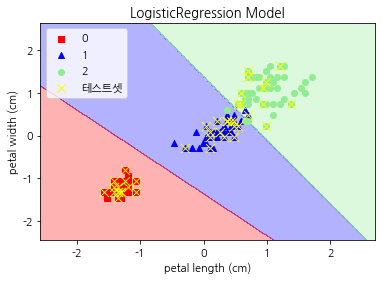

[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 ...
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]]


In [39]:
log = LogisticRegression(C=1000)
log.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=log, test_idx=range(105, 150), title = "LogisticRegression Model")

#LogisticRegression(C= ) C파라메터는 오버피팅, 언더피팅을 방지하기 위해 들어가는 값. 작으면 작을 수록 정규화가 강하게 일어난다.
#.fit은 학습을 시작하는 함수

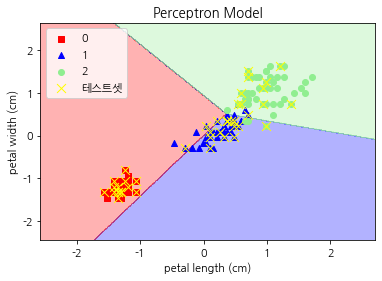

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


In [40]:
ppn = Perceptron(max_iter=300, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150), title="Perceptron Model")
#퍼셉트론 학습
#max_iter = 최적화를 위한 반복 횟수, eta0 = 학습률